# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

### 1. Exploratory data analysis (EDA)

In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor

In [377]:
train = pd.read_csv('train.txt',sep=',')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [378]:
test = pd.read_csv('test.txt',sep=',')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [379]:
#Observation
#as per the statement given there are 10 outlet_identifier and 1559 item_identifier available
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [380]:
# combining train and test set for preprocessing

train['Source'] = 'train'
test['Source'] = 'test'

data = pd.concat([train,test],ignore_index=True,sort=False)

In [381]:
#missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

In [382]:
#shows the numeric details
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [383]:
data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
Source                           2
dtype: int64

In [384]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [385]:
categorical_features = train.select_dtypes(include=[np.object])
categorical_features = categorical_features.drop(['Item_Identifier','Outlet_Identifier','Source'],axis=1)                        

In [386]:
for val in categorical_features:
    print(data[val].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


### 2.  Data Cleaning

In [387]:
# Let's impute the missing values

# Item_Weight

item_weight_avg = data.pivot_table(values='Item_Weight',index='Item_Identifier')
# missing_weight = data['Item_Weight'].isnull()
# data.loc[missing_weight,'Item_Weight']  = data.loc[missing_weight,'Item_Identifier'].apply(lambda x:item_weight_avg.loc[x]) 
data["Item_Weight"] = data.groupby(['Item_Identifier','Item_Type','Item_Fat_Content'])['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [388]:
data['Item_Weight'].isnull().sum()

0

In [389]:
# Outlet_Size
data['Outlet_Size'].isnull().sum()

4016

In [390]:
#Import mode function:
from scipy.stats import mode
#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
# missing_outlet_size = data['Outlet_Size'].isnull()
# data.loc[missing_outlet_size,'Outlet_Size'] = data.loc[missing_outlet_size,'Outlet_Type'].apply(lambda x: outlet_size_mode[x][0] )
data["Outlet_Size"] = data.groupby(['Outlet_Location_Type','Outlet_Type'],as_index=False)['Outlet_Size'].transform(lambda x: x.fillna(x.ffill()))
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

In [391]:
data['Outlet_Type'].isnull().sum()

0

### 3. Feature Engineering

In [392]:
#combining outlet type
data.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales')

#sales performance is different for Supermarket Type 2 & 3 so we will drop the idea of combining both

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


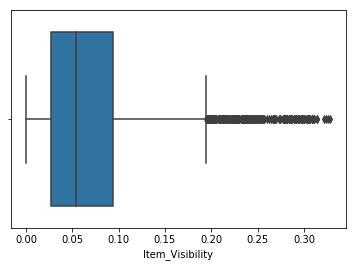

In [393]:
#Outlier Detction
sns.boxplot(data['Item_Visibility'])
plt.show()

In [394]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')
missing_visiblity = data['Item_Visibility'] == 0 
data.loc[missing_visiblity,'Item_Visibility'] = 0.0035747

In [395]:
data.loc[data['Item_Visibility']>=0.175,'Item_Visibility'] = 0.175

In [396]:
(data['Item_Visibility']==0).sum()

0

In [397]:
data['Item_Visibility'].describe()

count    14204.000000
mean         0.064818
std          0.047037
min          0.003575
25%          0.027036
50%          0.054021
75%          0.094037
max          0.175000
Name: Item_Visibility, dtype: float64

In [398]:
func = lambda x: x['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']]
data['Item_Visibility_MeanRatio'] = data.apply(func,axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         0.998103
std          0.319796
min          0.018268
25%          0.921522
50%          0.960590
75%          1.041127
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

In [399]:
data['Item_Type_Combined'] = data['Item_Identifier'].str[:2].map({'FD':'Food','DR':'Drinks','NC':'Non-Consumable'})
# data[(data['Item_Type_Combined'] =='Food') & (data['Item_Type']=='Dairy')].loc['Item_Type_Combined'] = 'Food-Dairy'
# data[(data['Item_Type_Combined'] =='Drinks') & (data['Item_Type']=='Dairy')].loc['Item_Type_Combined'] = 'Drinks-Dairy'
data.loc[(data['Item_Type_Combined'] =='Food') & (data['Item_Type']=='Dairy'),'Item_Type_Combined']='Food-Dairy'
data.loc[(data['Item_Type_Combined'] =='Drinks') & (data['Item_Type']=='Dairy'),'Item_Type_Combined']='Drinks-Dairy'
# data['Item_Type_Combined'][(data['Item_Type_Combined'] =='Food') & (data['Item_Type']=='Dairy')]
data['Item_Type_Combined'].unique()

array(['Food-Dairy', 'Drinks', 'Food', 'Non-Consumable', 'Drinks-Dairy'],
      dtype=object)

In [400]:
#Change categories of low fat:

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [401]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [402]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']

In [403]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Source',
       'Item_Visibility_MeanRatio', 'Item_Type_Combined', 'Outlet_Years'],
      dtype='object')

In [404]:
# Sklean can accept only numerical data, so we have to convert the categorical to numerical using one hot code technique
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [405]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Source', 'Item_Visibility_MeanRatio',
       'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Item_Type_Combined_3',
       'Item_Type_Combined_4', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9'],
      dtype='object')

In [406]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
I

In [407]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


In [408]:
#Drop the columns which have been converted to different types:
data = data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1)

#Divide into test and train:
train = data.loc[data['Source']=="train"]

test = data.loc[data['Source']=="test"]

#Drop unnecessary columns:
test = test.drop(['Item_Outlet_Sales','Source'],axis=1)
train = train.drop(['Source'],axis=1)

In [409]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)
# I’ve put in self-explanatory comments. Please feel free to discuss in comments if you face difficulties in understanding the code. If you’re new to the concept of cross-validation, read more about it here.

# Linear Regression Model
# Lets make our first linear-regression model. Read more on Linear Regression here.



Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 44.2 | Min - 1075 | Max - 1213


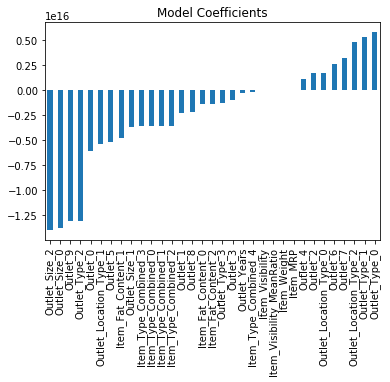

In [410]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1128
CV Score : Mean - 1130 | Std - 44.89 | Min - 1076 | Max - 1218


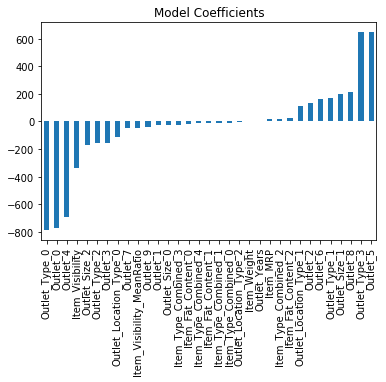

In [411]:
#Ridge Regression model

predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1058
CV Score : Mean - 1091 | Std - 45.32 | Min - 1015 | Max - 1184


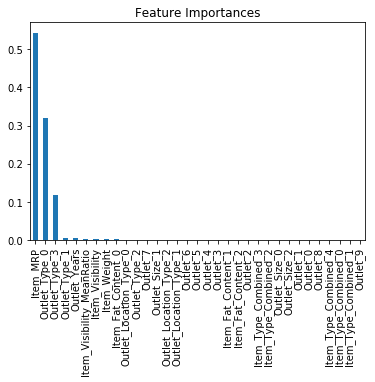

In [412]:
#Decision Tree model
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1073
CV Score : Mean - 1084 | Std - 43.72 | Min - 1019 | Max - 1161


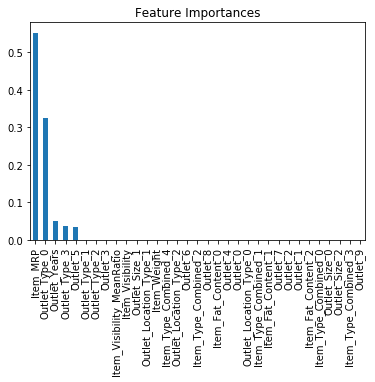

In [413]:
#Random forest model
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1068
CV Score : Mean - 1082 | Std - 43.64 | Min - 1019 | Max - 1160


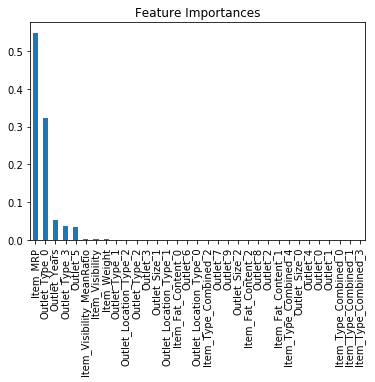

In [414]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg6 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
modelfit(alg6, train, test, predictors, target, IDcol, 'alg6.csv')
coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')

In [415]:
from xgboost import XGBRegressor
predictors = train.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train[predictors], train['Item_Outlet_Sales'], early_stopping_rounds=5, 
             eval_set=[(test[predictors], test['Item_Outlet_Sales'])], verbose=False)

C:\Users\john\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\john\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[16:48:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [416]:
#Predict training set:
target = 'Item_Outlet_Sales'
train_df_predictions = my_model.predict(train[predictors])
# make predictions
predictions = my_model.predict(test[predictors])
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test[target])))
print("RMSE : %.4g" % np.sqrt(mean_squared_error((train[target]).values, train_df_predictions)))
IDcol.append(target)
submission = pd.DataFrame({ x: test[x] for x in IDcol})
submission.to_csv("merda1.csv", index=False)

Mean Absolute Error : 83.91061617032629
RMSE : 1057


In [417]:

alg7=GradientBoostingRegressor(alpha=0.999, criterion='friedman_mse', init=None,
                          learning_rate=0.061, loss='huber', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=102,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# np.set_printoptions(threshold=100)
# gb.fit(train[predictors],train[target])
# test[target]=gb.predict(test[predictors])
# print(test)

modelfit(alg7, train, test, predictors, target, IDcol, 'alg7.csv')



Model Report
RMSE : 1052
CV Score : Mean - 1080 | Std - 45.43 | Min - 1009 | Max - 1170


In [418]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Identifier             object
Item_Outlet_Sales            float64
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Item_Type_Combined_3           uint8
Item_Type_Combined_4           uint8
Outlet_0                       uint8
O

In [419]:
a = 10
a

10